# Assignment Day 21: 

## Bank Personal Loan application approval based on Logistic Regression

__Import Libraries__

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
%matplotlib inline

## Load the dataset and examine the data distributions

In [2]:
DS_PATH="./dataset/Bank_Personal_Loan_Modelling.xlsx"
def load_personal_loan_data(path=DS_PATH):
    return pd.read_excel(path, sheet_name="Data")

In [3]:
perloan_data = load_personal_loan_data()

In [4]:
perloan_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
perloan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
perloan_data["Personal Loan"].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [7]:
perloan_data.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

## Examine the Correlation on the data regards to the Personal Loan

In [8]:
corr = perloan_data.corr()

In [9]:
corr['Personal Loan'].sort_values(ascending=False)

Personal Loan         1.000000
Income                0.502462
CCAvg                 0.366891
CD Account            0.316355
Mortgage              0.142095
Education             0.136722
Family                0.061367
Securities Account    0.021954
Online                0.006278
CreditCard            0.002802
ZIP Code              0.000107
Experience           -0.007413
Age                  -0.007726
ID                   -0.024801
Name: Personal Loan, dtype: float64

In [10]:
perloan_data.CreditCard.value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [11]:
perloan_data.Mortgage.value_counts()

0      3462
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64

In [12]:
perloan_data.ID.value_counts()

2047    1
2608    1
4647    1
2600    1
553     1
       ..
3263    1
1218    1
3267    1
1222    1
2049    1
Name: ID, Length: 5000, dtype: int64

In [13]:
perloan_data['ZIP Code'].value_counts()

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94970      1
94598      1
90068      1
94087      1
Name: ZIP Code, Length: 467, dtype: int64

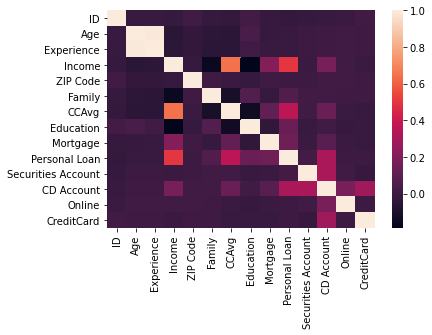

In [14]:
sns.heatmap(corr)

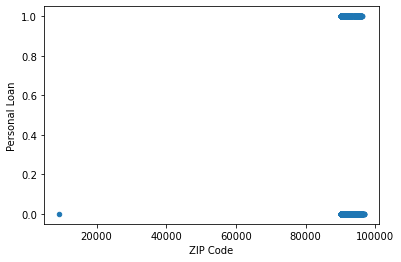

In [15]:
perloan_data.plot(kind='scatter', x='ZIP Code', y='Personal Loan')

## Personal Loan is the dependent variable and the columns of ID is a unique field which can be dropped, ZIP Code has no correlation, hence it can be dropped

In [16]:
dv='Personal Loan'
y = perloan_data[dv]
X = perloan_data.drop([dv, 'ZIP Code', 'ID'], axis=1)

## Split the Training and Split on the dataset

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.head(2))
print(y_train.head(2))

      Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
4227   32           7     111       1    3.8          1         0   
4676   39          13      68       3    2.1          1         0   

      Securities Account  CD Account  Online  CreditCard  
4227                   1           0       0           0  
4676                   1           0       1           0  
4227    0
4676    0
Name: Personal Loan, dtype: int64


In [18]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 4227 to 860
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4000 non-null   int64  
 1   Experience          4000 non-null   int64  
 2   Income              4000 non-null   int64  
 3   Family              4000 non-null   int64  
 4   CCAvg               4000 non-null   float64
 5   Education           4000 non-null   int64  
 6   Mortgage            4000 non-null   int64  
 7   Securities Account  4000 non-null   int64  
 8   CD Account          4000 non-null   int64  
 9   Online              4000 non-null   int64  
 10  CreditCard          4000 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 375.0 KB


## Apply Standard Scaler on the dataset with the help of Pipeline

In [19]:
def personalloan_data_prepare(data):
    np = Pipeline([
        ('std scaler', StandardScaler()),
    ])
    
    return np.fit_transform(data)

In [20]:
X_prepared = personalloan_data_prepare(X_train)

## Create and Apply the Logistic Regression Model

In [21]:
logis = LogisticRegression()

logis.fit(X_prepared, y_train)

LogisticRegression()

In [22]:
logis.score(X_prepared, y_train)

0.9515

_Achieved __95.15%__ of the accuracy score in logistic regression_

In [23]:
logis.coef_

array([[-0.28018858,  0.40662645,  2.39311811,  0.81465504,  0.18785222,
         1.3379283 ,  0.0564678 , -0.26692356,  0.89116227, -0.30301545,
        -0.55197952]])

In [24]:
logis.intercept_

array([-4.56370903])

## Lets run it against the test set

In [25]:
X_test_prepared = personalloan_data_prepare(X_test)

In [26]:
y_predict = logis.predict(X_test_prepared)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [27]:
y_test

1501    0
2586    1
2653    0
1055    0
705     0
       ..
4711    0
2313    0
3214    0
2732    0
1926    0
Name: Personal Loan, Length: 1000, dtype: int64

In [28]:
logis.score(X_test_prepared, y_test)

0.954

_The test set prediction is around __95.4%___